# Análisis de la Variación Antes y Después de la Publicación de la Tasa del Mercado Informal de Divisas.

**@author:** Carlos Enrique Muniz Cuza

**@date:** Noviembre 16, 2022

Este documento presenta un análisis de la distribución de la variación diaria promedio de la tasa de cambio de ElToque (ET). La variación diaria promedio (VDP) no es más que la diferencia de los valores promedios diarios. El objetivo es argumentar en favor de la idea de que si bien la publicación de la tasa referencial de ET puede influir levemente, esa influencia no condiciona el comportamiento del mercado. La principal hipótesis es que la distribución VDP de la tasa de cambio se comporta igual antes y después de la publicación de la tasa referencial de ET. Como parte del análisis hacemos las siguientes tareas:

1. Análisis del coeficiente de variación (CV) de VDP: El CV es una medida estadística de la dispersión de puntos de datos alrededor de la media. Su análisis nos ayudará a entender si existe diferencia entre los datos colectados en el pasado y los actuales.
    
2. Prueba de hipótesis de Kolmogorov-Smirnov (KS): Usamos KS para verificar si efectivamente la distribución de probabilidad antes y después de la tasa de ET han cambiado. 

3. Análisis del índice de estabilidad de la población (IEP): IEP mide cuánto se ha desplazado una variable entre dos distribuciones. Por tanto, lo usamos para medir si ha habido un cambio en la distribución de VDP.

4. Prueba de hipótesis T-test (T-T) para medias de dos poblaciones: Usamos esta prueba para analizar si los valores medios (esperados) de la tasa de referencia son todavía idénticos.  

Los resultados obtenidos con las técnicas CV, KS y IEP, muestran que ha ocurrido un cambio significativo de la distribución de VDP antes y durante el 2022. Los principales motivos a los que se les puede atribuir estos resultados son: la presencia de comportamiento anómalo de corto tiempo durante los meses de enero, mayo y julio del 2022, y a un cambio en la dispersión de los valores con respecto a su valor medio. Sin embargo, T-T muestra que no hay evidencia suficiente para afirmar que los valores medios de VDP son distintos. Esto quiere decir que, en promedio, los valores de la tasa referencia siguen aumentando o disminuyendo de manera idéntica antes y durante el 2022. Por tanto, se puede concluir que la tasa de referencia de ET no ha influenciado el comportamiento del mercado. Durante este documento presentaremos la metodología seguida, visualizaremos los datos y discutiremos los resultados.   

## 1. Análisis Exploratoria de los Datos y Metodología

En esta sección, cargamos, y visualizamos los datos.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('./all_days_stats_by_currencies.xlsx')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)
df.head(10)

,Moneda,Id,Oferta
Fecha,,,
2021-01-02 13:00:02,USD,61acb42dab932e127b42177e,50.0
2021-01-07 19:12:15,USD,61acb883bc2bca1ccad3d63d,49.0
2021-01-09 03:15:10,USD,61acb948bc2bca1ccad3d7a5,40.0
2021-01-10 20:44:38,USD,61acba13bc2bca1ccad3d92f,37.5
2021-01-14 20:04:20,USD,61acb241ab932e127b4212c9,42.0
2021-01-20 18:28:01,MLC,61acbe52bc2bca1ccad3e231,42.5
2021-01-21 03:23:10,MLC,61acbec3bc2bca1ccad3e2f3,42.5
2021-01-21 15:50:40,MLC,61acbf09bc2bca1ccad3e3fc,45.0
2021-01-22 18:57:31,MLC,61acbf4abc2bca1ccad3e466,43.0


Ahora, por cada moneda, calculemos la media diaria eliminando los outliers. 

In [12]:
def get_lower_upper_bond(values):
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)
    
    lower_iqd = q1 - 1.5*(q3-q1)
    upper_iqd = q3 + 1.5*(q3-q1)
    
    return lower_iqd, upper_iqd
    

def get_mean_without_outliers(ti):
    if ti.values.shape[0] < 1:
        return np.NaN
    
    lower_iqd, upper_iqd = get_lower_upper_bond(ti.values)
    
    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]
    
    return new_ti.mean()

def get_median_without_outliers(ti):
    if ti.values.shape[0] < 1:
        return np.NaN
    
    lower_iqd, upper_iqd = get_lower_upper_bond(ti.values)
    
    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]
    
    return new_ti.median()
    

daily_mean = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers})
# daily_median = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers})

Visualicemos la diferencia de la media diaria para el Euro antes y durante del 2022.

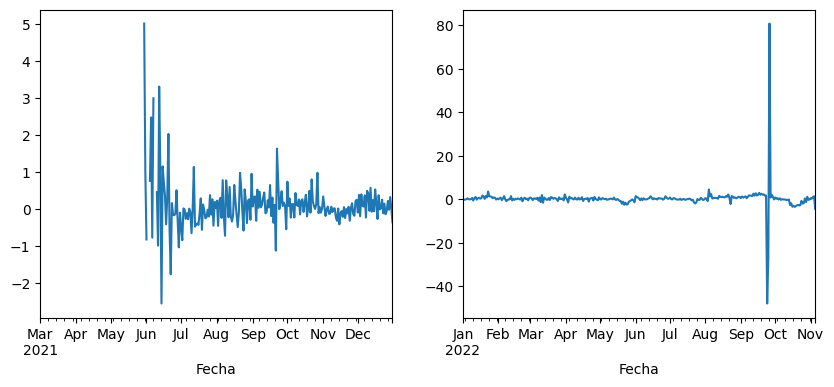

In [25]:
daily_mean_ecu = daily_mean.loc['ECU'].diff()
daily_mean_ecu_2021 = daily_mean_ecu[daily_mean_ecu.index < '2022']
daily_mean_ecu_2022 = daily_mean_ecu[daily_mean_ecu.index >= '2022']

plt.subplot(121)
daily_mean_ecu_2021.Oferta.plot()
plt.subplot(122)
daily_mean_ecu_2022.Oferta.plot(figsize=(10, 4))
plt.show()

Ahora, visualicemos la diferencia de la media diaria para el MLC antes y durante del 2022.

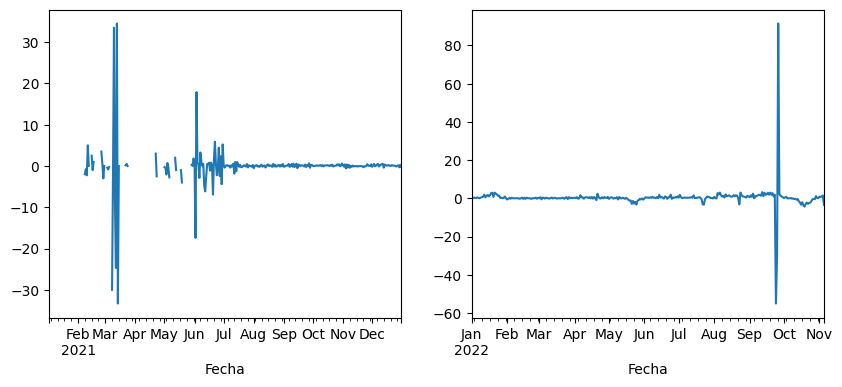

In [26]:
daily_mean_usd = daily_mean.loc['USD'].diff()
daily_mean_usd_2021 = daily_mean_usd[daily_mean_usd.index < '2022']
daily_mean_usd_2022 = daily_mean_usd[daily_mean_usd.index >= '2022']
plt.subplot(121)
daily_mean_usd_2021.Oferta.plot()
plt.subplot(122)
daily_mean_usd_2022.Oferta.plot(figsize=(10, 4))
plt.show()

Finalmente, visualicemos la diferencia de la media diaria para el MLC antes y durante del 2022

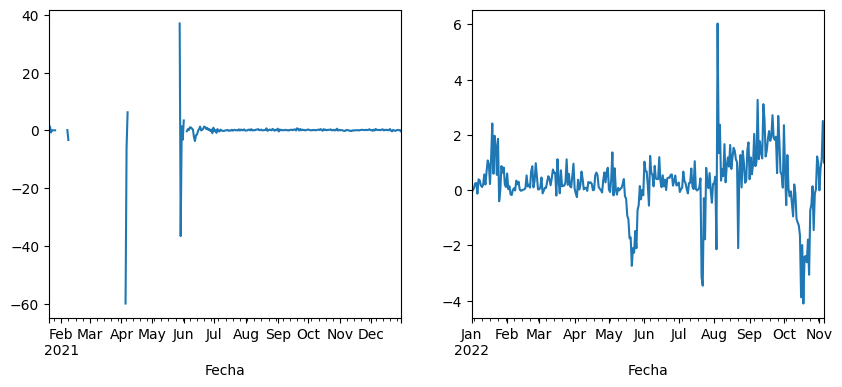

In [34]:
daily_mean_mlc = daily_mean.loc['MLC'].diff()
daily_mean_mlc_2021 = daily_mean_mlc[daily_mean_mlc.index < '2022']
daily_mean_mlc_2022 = daily_mean_mlc[daily_mean_mlc.index >= '2022']
plt.subplot(121)
daily_mean_mlc_2021.Oferta.plot()
plt.subplot(122)
daily_mean_mlc_2022.Oferta.plot(figsize=(10, 4))
plt.show()

### 1.1. Análisis Visual

Los datos muestran dos aspectos importantes:

1. Antes de Julio del 2021 muchos valores están ausentes lo cual imposibilita hacer un análisis antes de esa fecha.
2. En Septiembre 2022 ocurre una anomalía que produce un descenso y aumento de la media de los valores en pocos días. Entonces, cualquier análisis estadístico que hagamos incluyendo esa anomalía dará como resultado un cambio de la distribution de los valores. 

### 1.2 Metodología

Considerando lo anterior, centramos el análisis en los datos recolectados entre Agosto, 2021 y Agosto, 2022. En ese período, analizamos la distribución de VDP en búsqueda de responder si existe, o no, un cambio significativo de la variación de los datos. Analizar solamente este periodo es intuitivo. Creemos que si la tasa de referencia de ET adquiere mayor popularidad en el 2022, entonces de haber influenciado el mercado, lo tuvo que hacer a partir del 2022. Empezamos el análisis enfocados a la moneda USD visualizando los datos de nuevo en ese período.


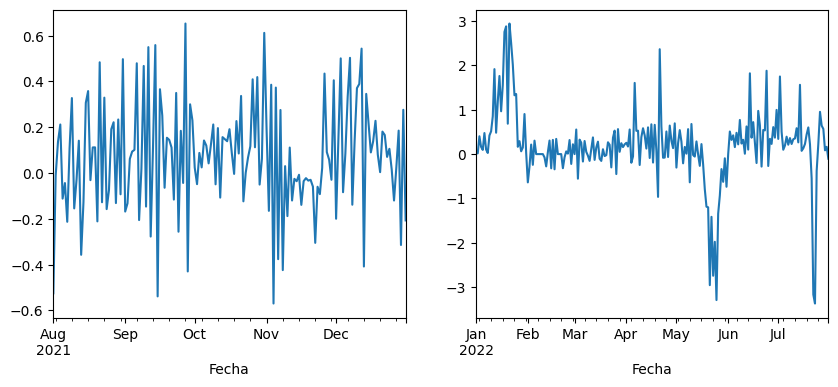

In [36]:
daily_mean_usd_2021 = daily_mean_usd_2021[daily_mean_usd_2021.index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_usd_2022 = daily_mean_usd_2022[daily_mean_usd_2022.index <= pd.to_datetime('31/7/2022', dayfirst=True)]
plt.subplot(121)
daily_mean_usd_2021.Oferta.plot()
plt.subplot(122)
daily_mean_usd_2022.Oferta.plot(figsize=(10, 4))
plt.show()

Lo primero que apreciamos es un ligero cambio de la distribución. En el 2021 los valores esta más cercanos a 0, mientras que en el 2022 se nota una mayor desviación. Por ejemplo, en enero existe un incremento significativo de la tasa de cambio, mientras que a finales de mayo notamos un descenso. Sin embargo, en ambos casos, la media parece ser menor de 1 lo cual indica que el índice de crecimiento es menor de un peso por día en el 2021 y el 2022. Veamos cómo se comporta el coeficiente de variación. 

## 2. Análisis del Coeficiente de Variación.

El coeficiente de variación (desviación estándar relativa) es una medida estadística de la dispersión de puntos de datos alrededor de la media. La métrica se usa comúnmente para comparar la dispersión de datos entre distintas series de datos. A diferencia de la desviación estándar que siempre debe considerarse en el contexto de la media de los datos, el coeficiente de variación proporciona una herramienta relativamente simple y rápida para comparar diferentes series de datos. Matemáticamente, la fórmula estándar para el coeficiente de variación se expresa de la siguiente manera $cv = \sigma/\mu*100$, donde $\sigma$ es la desviación estándar y $\mu$ es la media. 

**Hipótesis:** El coeficiente de variación de VDP antes del 2022 es igual al coeficiente de variación actual. 

In [37]:
print('2021 desviación estándar:', np.round(daily_mean_usd_2021.std().values[0], 2))
print('2021 valor medio:', np.round(daily_mean_usd_2021.mean().values[0], 2))
print('2022 desviación estándar:', np.round(daily_mean_usd_2022.std().values[0], 2))
print('2022 valor medio:', np.round(daily_mean_usd_2022.mean().values[0], 2))

cv = lambda x: np.std(x) / np.mean(x) 

print('Coeficiente de Variación 2021:', np.round(cv(daily_mean_usd_2021).values[0], 2))
print('Coeficiente de Variación 2022: ', np.round(cv(daily_mean_usd_2022).values[0], 2))

2021 desviación estándar: 0.24
2021 valor medio: 0.07
2022 desviación estándar: 0.84
2022 valor medio: 0.19
Coeficiente de Variación 2021: 3.25
Coeficiente de Variación 2022:  4.33


Los resultados indican que existe un cambio en el coeficiente de variación de ambos periodos de tiempo. Específicamente, el año 2022 tiene un mayor coeficiente de variación que significa mayor dispersión de los datos. Eso no significa que los datos son completamente diferentes, simplemente que por algún motivo existe mayor variación en el 2022 comparado al 2021. Esto puede deberse a varios motivos, por ejemplo, diferentes acontecimientos en el país pudieron influenciar la tasa durante el 2022. Una observación notable es que los valores de la media ahora son un poco más elevados, lo cual indica mayor crecimiento diario de la tasa de representativa con respecto al año 2022. Puede ser interesante comparar la tasa de crecimiento con los meses octubre y noviembre para descubrir si la media sigue una tendencia positiva.  

El coeficiente de variación no es suficiente evidencia para determinar si ET influyó en la tasa representativa. Para investigar más en detalles, a continuación aplicamos la **prueba de hipótesis de Kolmogorov-Smirnov (KS)**.

## 3. Prueba de Hipótesis de Kolmogorov-Smirnov (KS).

La prueba KS es una prueba no paramétrica y sin distribución, i.e., no hace suposiciones sobre la distribución de los datos. KS se puede utilizar para comparar si dos muestras (D1 y D2) de distribuciones univariadas pertenecen a la misma distribución de probabilidad (hipótesis nula) o no (hipótesis alternativa).

**Hipótesis Nula:** La distribución de VDP es la misma antes del 2022 y durante.

**Hipótesis Alternativa:** La distribución de VDP es diferente antes del 2022 y durante.

Los datos del 2021 no se distribuyen normalmente (campana de Gauss) 
Los datos del 2022 no se distribuyen normalmente (campana de Gauss) 
Los datos no se distribuyen de la misma forma. Pvalue= 1.9e-05


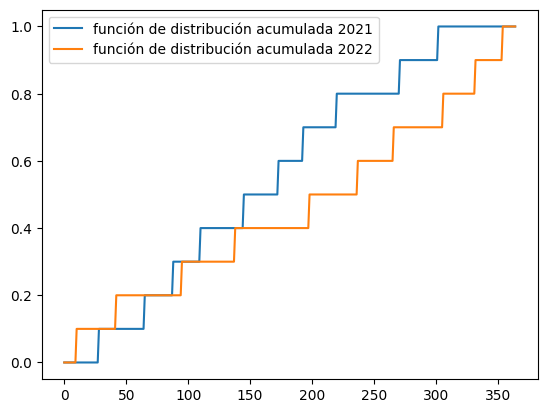

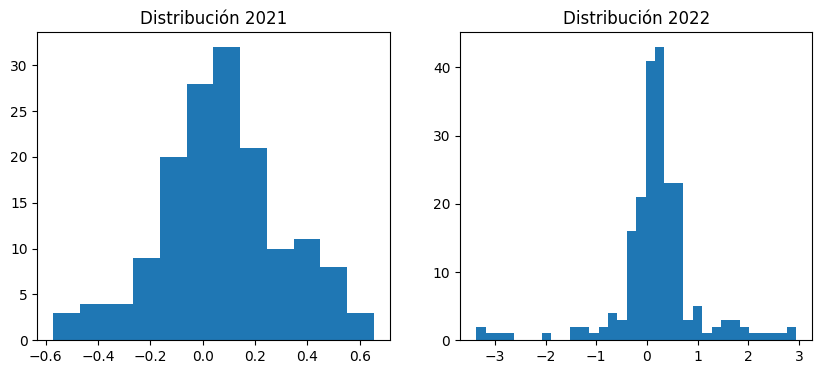

In [59]:
from scipy import stats as st
from scipy.stats import ks_2samp
from scipy.stats import kstest

def cdf(data, sample_conc):
    return [np.round(st.percentileofscore(data, value)/100, 1) for value in sample_conc]

def critical_diff(D1, D2):
    return 1.36*np.sqrt(len(D1)**-1 + len(D2)**-1) # 95% confidence interval

def detect_drift(D1, D2) -> bool:
    samp_concat = np.sort(np.concatenate((D1, D2)))
    samp_a_cdf = cdf(D1, samp_concat)
    samp_b_cdf = cdf(D2, samp_concat)
    plt.plot(samp_a_cdf, label='función de distribución acumulada 2021')
    plt.plot(samp_b_cdf, label='función de distribución acumulada 2022')
    plt.legend()
    #compute absolute difference
    samp_diff = np.abs(np.subtract(samp_a_cdf, samp_b_cdf))
    drift = max(samp_diff) > critical_diff(D1, D2)
    drift_detected = True if drift > critical_diff(D1, D2) else False
    plt.show()
    return drift_detected

#perform Kolmogorov-Smirnov test
_, pvalue = kstest(daily_mean_usd_2021.Oferta.values, 'norm')

if pvalue < 0.05:
    print("Los datos del 2021 no se distribuyen normalmente (campana de Gauss) ")
else:
    print("Los datos del 2021 se distribuyen normalmente (campana de Gauss)  ")

_, pvalue = kstest(daily_mean_usd_2022.Oferta.values, 'norm')

if pvalue < 0.05:
    print("Los datos del 2022 no se distribuyen normalmente (campana de Gauss) ")
else:
    print("Los datos del 2022 se distribuyen normalmente (campana de Gauss)  ")

_, pvalue = ks_2samp(daily_mean_usd_2021.Oferta.values, daily_mean_usd_2022.Oferta.values)

if pvalue < 0.05:
    print("Los datos no se distribuyen de la misma forma. Pvalue=", np.round(pvalue, 6))
else:
    print("Los datos siguen la misma distribución. Pvalue=", np.round(pvalue, 6))

r = detect_drift(daily_mean_usd_2021.Oferta.values, daily_mean_usd_2022.Oferta.values)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(daily_mean_usd_2021.Oferta.values, bins='auto')
plt.title("Distribución 2021")
plt.subplot(122)
plt.hist(daily_mean_usd_2022.Oferta.values, bins='auto')
plt.title("Distribución 2022")
plt.show()

Como se puede observar, los datos no se distribuyen de la misma forma, o en términos estadísticos, no siguen la misma distribución de probabilidad. El p-valor de la prueba KS es menor a 0.05, por tanto, las distribuciones no son iguales. Las representaciones gráficas de las distribuciones también parecen confirmar los resultados de la prueba KS. Se puede claramente observar un cambio en las distribuciones. Esto se puede atribuir principalmente, a los comportamientos anómalos sucedidos durante el 2022 otorgando valores de densidad a valores alejados de la media como -3 y 3. En la figura "Distribución 2022" se puede observar valores de densidad para esos valores. Obviamente, la prueba KS no distingue esas pequeñas perturbaciones en el 2022 y en cambio cae víctima de ellos rechazando la Hipótesis Nula. Eso nos lleva a nuestro tercer análisis usando el **índice de estabilidad de la población**.

## 4. Análisis del Indice de Estabilidad de la Población (IEP)

El IEP es estadístico de número único ampliamente utilizado que mide cuánto se ha desplazado una variable entre dos distribuciones. Lo hace agrupando las dos distribuciones y comparando los porcentajes de elementos en cada uno de los cubos, lo que da como resultado un solo número que puede usar para comprender qué tan diferentes son las poblaciones. Las interpretaciones comúnmente utilizadas del EIP son:

**PSI < 0,1:** sin cambios significativos

**PSI < 0,2:** cambio moderado

**PSI >= 0.2:** cambio significativo

Calculemos nuestro IEP.

In [56]:
def psi(expected_array, actual_array, buckets, buckettype = 'quantiles'):
    def scale_range (input, min, max):
        input += -(np.min(input))
        input /= np.max(input) / (max - min)
        input += min
        return input


    breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

    if buckettype == 'bins':
        breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
    elif buckettype == 'quantiles':
        breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])

    expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
    actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

    def sub_psi(e_perc, a_perc):
        if a_perc == 0:
            a_perc = 0.0001
        if e_perc == 0:
            e_perc = 0.0001

        value = (e_perc - a_perc) * np.log(e_perc / a_perc)
        return value

    psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

    return psi_value

iep = psi(daily_mean_usd_2021.Oferta.values, daily_mean_usd_2022.Oferta.values, 10)

print('El IEP obtenido es', iep)

El IEP obtenido es 0.2675056826837103


d:\pycharmprojects\eltoque\env\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Malas noticias de nuevo, el IEP obtenido es aproximadamente 0.27. Esto quiere decir que ha ocurrido cambio significativo entre las tasas de referencia antes del 2022 y durante. Nos queda la pregunta, sucede lo mismo con el MLC y el EURO? Hagamos el análisis anterior para esas dos monedas.

## 5. Resultados de CV, KS and IEP para el MLC

2021 desviación estándar: 0.19
2021 valor medio: 0.1
2022 desviación estándar: 0.71
2022 valor medio: 0.17
Coeficiente de Variación 2021: 1.8
Coeficiente de Variación 2022:  4.18
Los datos no se distribuyen de la misma forma. Pvalue= 2e-06
El IEP obtenido es 0.352689919202384


d:\pycharmprojects\eltoque\env\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


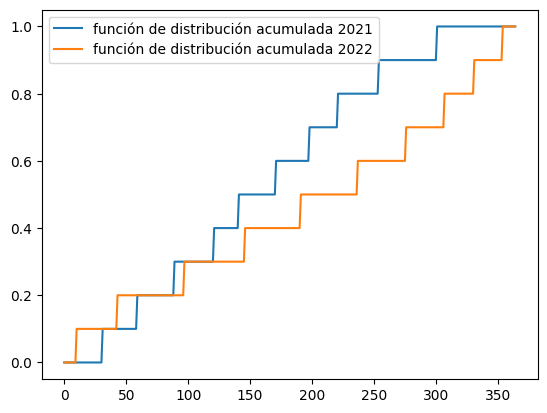

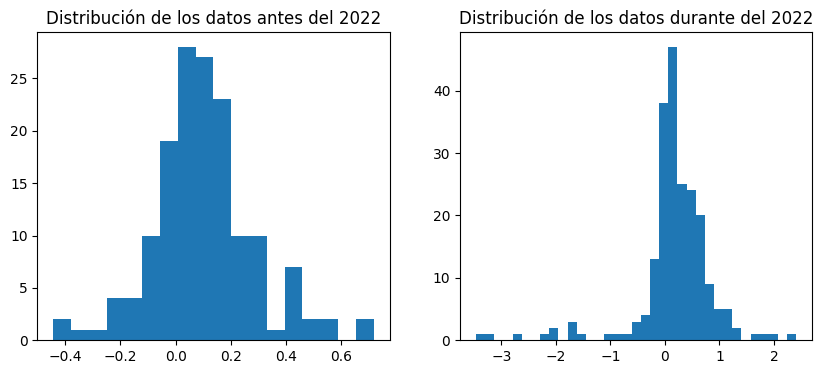

In [67]:
daily_mean_mlc_2021 = daily_mean_mlc_2021[daily_mean_mlc_2021.index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_mlc_2022 = daily_mean_mlc_2022[daily_mean_mlc_2022.index <= pd.to_datetime('31/7/2022', dayfirst=True)]

print('2021 desviación estándar:', np.round(daily_mean_mlc_2021.std().values[0], 2))
print('2021 valor medio:', np.round(daily_mean_mlc_2021.mean().values[0], 2))
print('2022 desviación estándar:', np.round(daily_mean_mlc_2022.std().values[0], 2))
print('2022 valor medio:', np.round(daily_mean_mlc_2022.mean().values[0], 2))

print('Coeficiente de Variación 2021:', np.round(cv(daily_mean_mlc_2021).values[0], 2))
print('Coeficiente de Variación 2022: ', np.round(cv(daily_mean_mlc_2022).values[0], 2))

_, pvalue = ks_2samp(daily_mean_mlc_2021.Oferta.values, daily_mean_mlc_2022.Oferta.values)

if pvalue < 0.05:
    print("Los datos no se distribuyen de la misma forma. Pvalue=", np.round(pvalue, 6))
else:
    print("Los datos siguen la misma distribución. Pvalue=", np.round(pvalue, 6))

iep = psi(daily_mean_mlc_2021.Oferta.values, daily_mean_mlc_2022.Oferta.values, 10)

print('El IEP obtenido es', iep)

r = detect_drift(daily_mean_mlc_2021.Oferta.values, daily_mean_mlc_2022.Oferta.values)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(daily_mean_mlc_2021.Oferta.values, bins='auto')
plt.title("Distribución de los datos antes del 2022")
plt.subplot(122)
plt.hist(daily_mean_mlc_2022.Oferta.values, bins='auto')
plt.title("Distribución de los datos durante del 2022")
plt.show()



## 6. Resultados de CV, KS and IEP para el EURO

2021 desviación estándar: 0.35
2021 valor medio: 0.08
2022 desviación estándar: 0.77
2022 valor medio: 0.13
Coeficiente de Variación 2021: 4.19
Coeficiente de Variación 2022:  5.77
Los datos no se distribuyen de la misma forma. Pvalue= 0.004998
El IEP obtenido es 0.3087704974729734


d:\pycharmprojects\eltoque\env\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


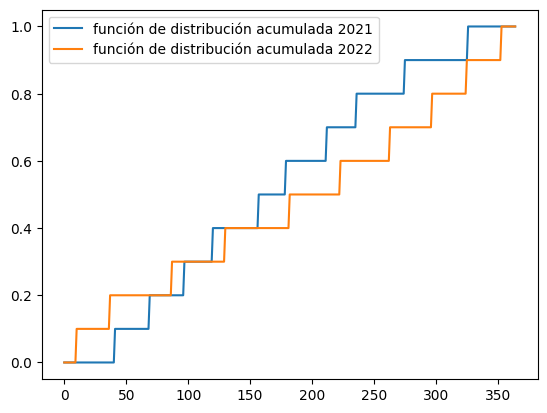

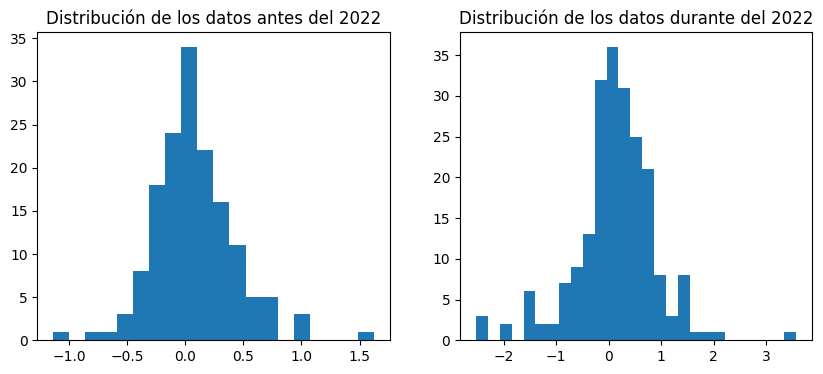

In [68]:
daily_mean_ecu_2021 = daily_mean_ecu_2021[daily_mean_ecu_2021.index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_ecu_2022 = daily_mean_ecu_2022[daily_mean_ecu_2022.index <= pd.to_datetime('31/7/2022', dayfirst=True)]

print('2021 desviación estándar:', np.round(daily_mean_ecu_2021.std().values[0], 2))
print('2021 valor medio:', np.round(daily_mean_ecu_2021.mean().values[0], 2))
print('2022 desviación estándar:', np.round(daily_mean_ecu_2022.std().values[0], 2))
print('2022 valor medio:', np.round(daily_mean_ecu_2022.mean().values[0], 2))
print('Coeficiente de Variación 2021:', np.round(cv(daily_mean_ecu_2021).values[0], 2))
print('Coeficiente de Variación 2022: ', np.round(cv(daily_mean_ecu_2022).values[0], 2))


_, pvalue = ks_2samp(daily_mean_ecu_2021.Oferta.values, daily_mean_ecu_2022.Oferta.values)

if pvalue < 0.05:
    print("Los datos no se distribuyen de la misma forma. Pvalue=", np.round(pvalue, 6))
else:
    print("Los datos siguen la misma distribución. Pvalue=", np.round(pvalue, 6))

iep = psi(daily_mean_ecu_2021.Oferta.values, daily_mean_ecu_2022.Oferta.values, 10)

print('El IEP obtenido es', iep)

r = detect_drift(daily_mean_ecu_2021.Oferta.values, daily_mean_ecu_2022.Oferta.values)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(daily_mean_ecu_2021.Oferta.values, bins='auto')
plt.title("Distribución de los datos antes del 2022")
plt.subplot(122)
plt.hist(daily_mean_ecu_2022.Oferta.values, bins='auto')
plt.title("Distribución de los datos durante del 2022")
plt.show()



## 7. Análisis de los Resultados para el MLC y el EURO

Como muestran los resultados, para el MLC y el EURO la tasa de referencia sigue el mismo patrón encontrado anteriormente para el USD. Los coeficientes de variación muestran un aumento de la dispersión de los datos, la prueba KS muestra que las distribuciones son distintas y el IEP muestra que ha habido un cambio significativo de la distribución de los datos. Es notable resaltar que en el caso del EURO el p-value es de solo 0.005. Esto quiere decir que las distribuciones son más cercanas comparado con el USD y el MLC donde el p-value era mucho menor. 

Hasta este punto hemos contestado la pregunta: ¿Es la distribución de VDP igual antes y durante del 2022? La respuesta en pocas palabras es **NO**. Las razones pueden ser varias. 1) Una nueva versión del algoritmo 2) Más usuarios en las plataformas de extracción de la tasa y por tanto más discrepancia entre los valores. 3) Intentos de desestabilización del algoritmo 4) Acontecimientos reales en Cuba que provocaron que la tasa sufriera cambios significativos de un día al otro como se observa en la gráfica, los principales son a finales de enero, mayo y julio del 2022. 

Los resultados indican que el mayor factor afectando las distribuciones es la dispersión de los datos, i.e., su desviación estándar. Sin embargo, no hemos considerado la pregunta: ¿Es la media de la distribución de VDP igual antes y durante el 2022? Para contestar esa pregunta, debemos hacer una segunda prueba de hipótesis.

## 8. Prueba de Hipótesis de Medias de T-test 

La prueba t-test cuantifica la diferencia entre las medias aritméticas de las dos muestras. En este caso el valor de la tasa referencial antes y durante el 2022. El p-valor cuantifica la probabilidad de observar valores extremos asumiendo verdadera la Hipótesis Nula que las muestras se extraen de poblaciones con las mismas medias poblacionales. Un p-valor mayor que un umbral elegido (por ejemplo, 5% o 1%) indica que no es tan improbable que nuestra observación haya ocurrido por casualidad. Por lo tanto, no rechazamos la hipótesis nula de medias poblacionales iguales. Si el p-valor es más pequeño que nuestro umbral, entonces tenemos evidencia en contra de la hipótesis nula de medias poblacionales iguales.

**Hipótesis Nula:** La media de VDP es la misma antes y durante del 2022.

**Hipótesis Alternativa:** La media de VDP es diferente antes y durante del 2022.


In [74]:
from scipy.stats import ttest_ind

print(ttest_ind(daily_mean_usd_2021.Oferta.values, daily_mean_usd_2022.Oferta.values, equal_var=False))

print(ttest_ind(daily_mean_mlc_2021.Oferta.values, daily_mean_mlc_2022.Oferta.values, equal_var=False))

print(ttest_ind(daily_mean_ecu_2021.Oferta.values, daily_mean_ecu_2022.Oferta.values, equal_var=False))

Ttest_indResult(statistic=-1.978545649798441, pvalue=0.04893756248069177)
Ttest_indResult(statistic=-1.307524113506859, pvalue=0.1922377381804622)
Ttest_indResult(statistic=-0.8057760518641771, pvalue=0.4209783393128079)


Como se puede observar, los p-valores no son significativos dado el umbral del 5% y mucho menos dado el umbral del 1%. Esto quiere decir que no podemos estar seguros con un 95% y 99% de confianza de que la media de VDP **NO** son iguales antes y durante del 2022. ¿Qué significa eso? Eso significa que los valores de la tasa referencial están aumentando, o disminuyendo, en promedio, idénticamente antes y durante el 2022. O para ser más rigorosos con la estadística: Que **NO** hay evidencia para afirmar lo contrario.  

## Conclusiones y Trabajo Futuro

En este documento hemos hecho un análisis de la distribución de variación diaria promedio (VDP) de la tasa representativa de ElToque. El análisis ha arrojado la conclusión que la actual distribución de VDP ha cambiado significativamente con respecto al año 2021 a partir de un análisis del Coeficiente de Variación (CV), la prueba de Kolmogorov-Smirnov (KS) y el Índice de Estabilidad de la Población (IEP). Creemos que este resultado se debe a anomalías en el comportamiento de VDP durante la primera mitad del año 2022. Las razones pueden ser varias. 1) Una nueva versión del algoritmo 2) Más usuarios en las plataformas de extracción de la tasa y por tanto más discrepancia entre los valores. 3) Intentos de desestabilización del algoritmo 4) Acontecimientos reales en Cuba a finales de enero, mayo y julio del 2022. Por otra parte, un análisis de la media VDP muestra que no hay evidencia suficiente para afirmar que este valor a sufrido un cambio significativo antes y durante el 2022. En otras palabras, los valores de la tasa referencial están aumentando, o disminuyendo, en promedio, de manera idéntica antes y durante el 2022. Por tanto, se puede concluir que la tasa de referencia de ET no ha influenciado el comportamiento del mercado.

Como trabajo futuro nos proponemos:

1. Analizar más en profundidad las anomalías ocurridas en el año 2022. El análisis de estas anomalías puede ayudar a entender mejor los resultados arrojados por CV, KS y IEP.

2. Investigar otros métodos estadísticos para determinar si ha ocurrido cambio significativo en la distribución de VDP. Por ejemplo, podemos investigar las pruebas de causalidad de Granger y la de transferencia de Entropía.

3. Analizar si las anomalías se deben a ataques adversarios, errores de extracción del algoritmo o simplemente se deben a eventos nacionales reales que afectan la tasa de referencia.
